In [1]:
import pandas as pd
import numpy as np

original_data = pd.read_csv('flaringar_original_data.csv')

In [2]:
train_data = pd.read_csv("flaringar_training_sample.csv")

In [3]:
df = train_data.copy()
df.head()

,Flare Class,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,AREA_ACR,TOTFZ,MEANPOT,R_VALUE,EPSZ,SHRGT45
0,X,3249.07,41815000000,8.596110e+23,62133000000000,700.682,14899500000000,2.735020e+22,1103.97,-552.89,14038.00,4.820,-0.0251,59.489
1,X,3176.31,47782000000,9.662510e+23,69314200000000,157.759,9905710000000,3.176960e+22,1400.93,-869.70,13463.60,4.825,-0.0345,55.222
2,X,1892.92,26673000000,3.717600e+23,42117300000000,171.952,6528880000000,1.890010e+22,1370.85,-231.29,7496.19,4.438,-0.0164,42.934
3,X,1868.82,24509000000,3.483140e+23,36289300000000,429.602,21180700000000,1.732570e+22,1198.60,-317.56,8669.42,4.319,-0.0246,35.944
4,X,5271.77,102290000000,1.920230e+24,86898000000000,1066.250,16117800000000,6.440390e+22,1939.06,-6162.10,16094.80,4.912,-0.1143,41.102


In [4]:
test_data = pd.read_csv("flaringar_simple_random_40.csv")

In [5]:
df2 = test_data.copy()

In [6]:
def f(s):
    return s[0]

y_test = test_data['Flare Class'].apply(f)

In [7]:
del df2['fdate']
del df2['noaaar']
del df2['Flare Class']

In [8]:
y_test.head()

0    B
1    B
2    M
3    B
4    B
Name: Flare Class, dtype: object

In [9]:
df2.head()

,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,AREA_ACR,TOTFZ,MEANPOT,R_VALUE,EPSZ,SHRGT45
0,55.772,1.020700e+09,5.220000e+21,9.610000e+11,38.849,1.390000e+12,2.820000e+20,13.9159,115.820000,8009.98,3.102,0.2152,51.120
1,41.846,9.579600e+08,1.510000e+21,6.020000e+11,7.576,1.560000e+11,4.180000e+20,63.1692,-57.081000,2358.96,1.908,-0.1130,2.079
2,605.079,8.395900e+09,7.970000e+22,7.560000e+12,295.489,1.160000e+13,5.500000e+21,187.7550,-1069.000000,10742.80,4.173,-0.2415,12.511
3,34.981,1.882500e+09,1.590000e+21,6.240000e+11,1.055,7.150000e+11,4.610000e+20,134.5900,-0.072779,2012.54,2.449,-0.0001,1.010
4,633.567,1.114800e+10,1.060000e+23,8.990000e+12,30.109,4.540000e+12,7.240000e+21,255.5080,-1474.200000,9964.54,4.145,-0.2508,27.772


In [10]:
x_test = df.copy()

In [11]:
df2 = train_data.copy()
y_train = df2['Flare Class']
del df2['Flare Class']

In [12]:
x_train = df2

In [13]:
x_train.columns

Index(['TOTUSJH', 'TOTBSQ', 'TOTPOT', 'TOTUSJZ', 'ABSNJZH', 'SAVNCPP',
       'USFLUX', 'AREA_ACR', 'TOTFZ', 'MEANPOT', 'R_VALUE', 'EPSZ', 'SHRGT45'],
      dtype='object')

In [14]:
y_train 

0      X
1      X
2      X
3      X
4      X
      ..
430    C
431    C
432    C
433    C
434    C
Name: Flare Class, Length: 435, dtype: object

In [15]:
y = df['Flare Class']
del df['Flare Class']
x = df

In [16]:
# From initial dataset to training-test split

In [17]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8)

print([x_train.shape, y_train.shape])
print([x_test.shape, y_test.shape])

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
result = model.score(x_test,y_test)
print(result)

[(348, 13), (348,)]
[(87, 13), (87,)]
0.5747126436781609
Wall time: 853 ms


In [18]:
# Repeated random test-train splits

In [19]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
ssplit = ShuffleSplit(n_splits = 10, test_size = 0.10)
results = cross_val_score(model, x, y, cv = ssplit)
print(results)
print(np.mean(results))

[0.47727273 0.61363636 0.45454545 0.54545455 0.52272727 0.43181818
 0.54545455 0.63636364 0.43181818 0.56818182]
0.5227272727272727
Wall time: 79.8 ms


In [20]:
# From initial dataset to training-validation-test split

In [21]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x_train, x_rem, y_train, y_rem = train_test_split(x, y, train_size = 0.8)

test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size = test_size)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print("validation set score")
result = model.score(x_valid, y_valid)
print(result)
print("test score")
result = model.score(x_test, y_test)
print(result)

validation set score
0.6046511627906976
test score
0.4318181818181818
Wall time: 11 ms


In [22]:
# K fold cross validation

In [23]:
%%time
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
kfold_validation = KFold(10)
results = cross_val_score(model, x, y, cv = kfold_validation)
print(results)
print(np.mean(results))

[0.25       0.40909091 0.27272727 0.56818182 0.61363636 0.39534884
 0.41860465 0.44186047 0.41860465 0.44186047]
0.4229915433403805
Wall time: 73.8 ms


In [24]:
# Stratified k-fold Cross Validation

In [25]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

skfold = StratifiedKFold(n_splits=10)
model = DecisionTreeClassifier()
scores = cross_val_score(model, x, y, cv=skfold)
print(scores)
print(np.mean(scores))

[0.40909091 0.34090909 0.38636364 0.54545455 0.56818182 0.44186047
 0.48837209 0.53488372 0.51162791 0.41860465]
0.4645348837209302
Wall time: 78.4 ms


In [26]:
# leave-one-out cross validation(LOOCV)

In [27]:
%%time
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier()
leave_validation = LeaveOneOut()
results = cross_val_score(model, x, y, cv=leave_validation)
print(results)
print(len(results))
print(np.mean(results))

[0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.

# Bagging - Bootstrap + Aggregation

In [28]:
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier()
model.fit(x_train, y_train)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 4)
results = cross_val_score(model,x,y, scoring='accuracy', cv = cv)

print('Accuracy: ',mean(results))

Accuracy:  0.6252642706131079


In [29]:
y_test_pred = model.predict(x_test)

In [30]:
y_pred_bagging = y_test_pred

# Boosting 

# Adaptive Boosting - Ada boost

In [31]:
from sklearn.ensemble import AdaBoostClassifier

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8,random_state = 5)

clf = AdaBoostClassifier(random_state = 2)
clf.fit(x_train, y_train)

print('train score: ', clf.score(x_train, y_train))
print('test score: ', clf.score(x_test, y_test))

train score:  0.5114942528735632
test score:  0.5057471264367817


In [32]:
y_test_pred = clf.predict(x_test)

In [33]:
y_pred_adaboost = y_test_pred

# Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8,random_state = 5)

clf = GradientBoostingClassifier(random_state = 2)
clf.fit(x_train, y_train)

print('train score: ', clf.score(x_train, y_train))
print('test score: ', clf.score(x_test, y_test))

train score:  1.0
test score:  0.5977011494252874


In [35]:
y_test_pred = clf.predict(x_test)

In [36]:
y_pred_gradientboost = y_test_pred

# XGBoost

In [37]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You are using pip version 19.0.3, however version 22.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [38]:
from xgboost import XGBClassifier

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8,random_state = 5)

d = {'B':0,'C':1,'M':2,'X':3}

In [39]:
def f(char):
    if(char == 'B'):
        return d['B']
    elif(char == 'C'):
        return d['C']
    elif(char == 'M'):
        return d['M']
    else:
        return d['X']
    
y_train = y_train.apply(f)
y_test = y_test.apply(f)

In [40]:
clf = XGBClassifier(random_state = 2)
clf.fit(x_train, y_train)

print('train score: ', clf.score(x_train, y_train))
print('test score: ', clf.score(x_test, y_test))

train score:  1.0
test score:  0.632183908045977


In [41]:
y_test_pred = clf.predict(x_test)

In [42]:
y_pred_xgboost = y_test_pred

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8)

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [45]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)

In [46]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

c:\users\226735 c2in\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [47]:
clf2 = LogisticRegression()
clf2.fit(x_train_scaled, y_train)

LogisticRegression()

In [48]:
clf.predict(x_test)

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], dtype=object)

In [49]:
clf2.predict(x_test)

c:\users\226735 c2in\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array(['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X',
       'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X',
       'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X',
       'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X',
       'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X',
       'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X',
       'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X'], dtype=object)

In [50]:
clf3 = LogisticRegression(solver = "newton-cg", multi_class = 'multinomial', max_iter=1000)
clf3.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='newton-cg')

In [51]:
clf3.predict(x_test)

c:\users\226735 c2in\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array(['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X',
       'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X',
       'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X',
       'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X',
       'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X',
       'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X',
       'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X'], dtype=object)

In [52]:
y_test_pred = clf2.predict(x_test_scaled)

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_pred)


array([[24,  1,  1,  0],
       [ 4, 17, 10,  0],
       [ 3,  6, 14,  3],
       [ 0,  0,  4,  0]], dtype=int64)

In [54]:
clf2.score(x_test_scaled,y_test)

0.632183908045977

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_test, y_test_pred)

0.632183908045977

# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
clf5 = RandomForestClassifier(random_state = 0)

In [58]:
clf5.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=0)

In [59]:
clf5.score(x_test_scaled,y_test)

0.5862068965517241

In [60]:
y_test_pred = clf5.predict(x_test_scaled)

In [61]:
y_pred_rf = y_test_pred

In [62]:
confusion_matrix(y_test,y_test_pred)

array([[24,  2,  0,  0],
       [ 7, 10, 14,  0],
       [ 3,  5, 17,  1],
       [ 0,  0,  4,  0]], dtype=int64)

In [63]:
clf6 = RandomForestClassifier(random_state = 0, max_features = 7)

In [64]:
clf6.fit(x_train_scaled, y_train)
clf6.score(x_test_scaled,y_test)

0.5057471264367817

In [65]:
y_test_pred = clf6.predict(x_test_scaled)
confusion_matrix(y_test,y_test_pred)

array([[19,  6,  1,  0],
       [ 8,  9, 14,  0],
       [ 2,  6, 16,  2],
       [ 0,  0,  4,  0]], dtype=int64)

In [66]:
accuracy_score(y_test, y_test_pred)

0.5057471264367817

In [67]:
clf7 = RandomForestClassifier(n_estimators = 1000, 
                                       max_features=5, 
                                       )

In [68]:
clf7.fit(x_train_scaled, y_train)
clf7.score(x_test_scaled,y_test)

0.5747126436781609

# KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [70]:
clf7 = KNeighborsClassifier()
clf7.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [71]:
clf7.score(x_test_scaled, y_test)

0.4942528735632184

In [72]:
import matplotlib.pyplot as plt

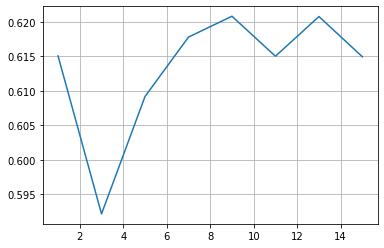

In [73]:
x_axis = []
y_axis = []
for i in range(1, 16, 2):
    clf8 = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(clf8, x_train_scaled, y_train)
    x_axis.append(i)
    y_axis.append(score.mean())
    
plt.plot(x_axis,y_axis)
plt.grid()
plt.show()

In [74]:
clf9 = KNeighborsClassifier(n_neighbors=9)
clf9.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

In [75]:
clf9.score(x_test_scaled, y_test)

0.5517241379310345

In [76]:
y_test_pred = clf9.predict(x_test_scaled)
confusion_matrix(y_test,y_test_pred)

array([[19,  7,  0,  0],
       [ 6, 13, 12,  0],
       [ 3,  7, 16,  0],
       [ 0,  0,  4,  0]], dtype=int64)

In [77]:
y_pred_knn = y_test_pred

In [78]:
accuracy_score(y_test, y_test_pred)

0.5517241379310345

# SVM

In [79]:
from sklearn.svm import SVC

In [80]:
clf10 = SVC(C=2)
clf10.fit(x_train_scaled, y_train)

SVC(C=2)

In [81]:
clf10.score(x_test_scaled, y_test)

0.6206896551724138

In [82]:
# Grid search Cross validation for choosing paramters

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
clf11 = SVC()
grid = {'C':[1e2, 1e3, 5e3, 1e4, 1e5],
       'gamma': [1e-3, 5e-4, 1e-4, 5e-3]}
abc = GridSearchCV(clf11, grid)
abc.fit(x_train_scaled, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [100.0, 1000.0, 5000.0, 10000.0, 100000.0],
                         'gamma': [0.001, 0.0005, 0.0001, 0.005]})

In [85]:
abc.best_estimator_

SVC(C=100.0, gamma=0.005)

In [86]:
clf12 = SVC(C=100, gamma = 0.0005)
clf12.fit(x_train_scaled, y_train)

SVC(C=100, gamma=0.0005)

In [87]:
clf12.score(x_test_scaled, y_test)

0.7011494252873564

In [88]:
y_test_pred = clf12.predict(x_test_scaled)
confusion_matrix(y_test,y_test_pred)

array([[25,  1,  0,  0],
       [ 4, 18,  9,  0],
       [ 2,  6, 18,  0],
       [ 0,  0,  4,  0]], dtype=int64)

In [89]:
y_pred_svm = y_test_pred

# Naive Bayes

In [90]:
from sklearn.naive_bayes import GaussianNB

In [91]:
clf13 = GaussianNB()
clf13.fit(x_train_scaled, y_train)

GaussianNB()

In [92]:
y_pred = clf13.predict(x_test_scaled)
confusion_matrix(y_test, y_test_pred)

array([[25,  1,  0,  0],
       [ 4, 18,  9,  0],
       [ 2,  6, 18,  0],
       [ 0,  0,  4,  0]], dtype=int64)

In [93]:
y_pred_nb = y_pred

In [94]:
y_pred_nb

array(['B', 'B', 'C', 'B', 'M', 'C', 'B', 'C', 'M', 'X', 'X', 'B', 'M',
       'B', 'B', 'M', 'C', 'B', 'X', 'X', 'X', 'B', 'B', 'M', 'C', 'B',
       'B', 'B', 'C', 'B', 'B', 'C', 'B', 'M', 'X', 'B', 'B', 'B', 'C',
       'M', 'X', 'B', 'M', 'X', 'C', 'C', 'M', 'M', 'M', 'B', 'C', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'C', 'C', 'C', 'M', 'B', 'C',
       'X', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'C', 'C', 'M',
       'B', 'C', 'B', 'C', 'B', 'B', 'M', 'B', 'C'], dtype='<U1')

In [95]:
clf13.score(x_test_scaled, y_test)

0.5747126436781609

# ENS for RF, SVM, KNN

In [96]:
def compute_ens_result(rf_result, knn_result, svm_result):
    final_results = []
    for i in range(0, len(rf_result)):
        rf_p = rf_result[i]
        knn_p = knn_result[i]
        svm_p = svm_result[i]
        if rf_p == knn_p and rf_p == svm_p :
            final_results.append(rf_p) 
        elif rf_p == knn_p or rf_p == svm_p :
            final_results.append(rf_p)
        elif svm_p == knn_p :
            final_results.append(knn_p)
        else :
            final_results.append(rf_p)
    
    return final_results

In [97]:
ens = compute_ens_result(y_pred_rf,y_pred_knn,y_pred_svm)

In [98]:
confusion_matrix(y_test, ens)

array([[24,  2,  0,  0],
       [ 5, 13, 13,  0],
       [ 3,  6, 17,  0],
       [ 0,  0,  4,  0]], dtype=int64)

In [99]:
labels = ['B','C','M','X']

In [100]:
from sklearn.metrics import multilabel_confusion_matrix

In [101]:
def log_cv_report(y_true, y_pred):
    labels = ['B','C','M','X']
    r = multilabel_confusion_matrix(y_true, y_pred,labels=labels)
    pm={}
    
    for i in range(len(labels)):
        l = labels[i]
        c = {}
        cm = r[i]
        c['TN'] = cm[0][0]
        c['FN'] = cm[1][0]
        c['TP'] = cm[1][1]
        c['FP'] = cm[0][1]
        c['T'] = cm.sum()
        if (c['FP'] == 0):
            c['TN'] = c['TN'] - 1
            c['FP'] = 1
        if (c['FN'] == 0):
            c['TP'] = c['TP'] - 1
            c['FN'] = 1
                  
        pm[l] = calc_metrics(c['TP'],c['TN'],c['FP'],c['FN'])
        
    ac = accuracy_score(y_true, y_pred)
    print('Prediction accuracy: ',ac)
    return pm;

In [102]:
def truncate_float(number, digits=4) -> float:
    try :
        if math.isnan(number):
            return 0.0
        stepper = 10.0 ** digits
        return math.trunc(stepper * number) / stepper
    except Exception as e:
        return number

In [103]:
def calc_metrics(TP,TN,FP,FN):
    P = TP + FN 
    N = TN + FP
    T = N + P 
    accuracy = 0
    balanced_accuracy = 0 
    precision = 0 
    recall = 0 
    TSS = 0 
    

    accuracy = (TP+TN) / (TP+FP+TN+FN)
    BACC =  ( (TP/(TP + FN)) + (TN/(TN + FP)) ) /2
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    precision = TP / (TP + FP)
    recall = TP / (TP  + FN) 
    TSS = (TP/(TP+FN)) - (FP/(FP+TN))


    return [truncate_float(BACC),truncate_float(TSS)]

In [104]:
BACC_TSS_BCMX = log_cv_report(y_test,ens)
BACC_TSS_BCMX

Prediction accuracy:  0.6206896551724138


{'B': [0.8959646910466583, 0.7919293820933165],
 'C': [0.6382488479262672, 0.2764976958525346],
 'M': [0.687578814627995, 0.37515762925598994],
 'X': [0.4939759036144578, -0.012048192771084338]}

# ENS for RF, Gradient, AdaBoost

In [105]:
def compute_ens_result(rf_result, gradient_result, adaboost_result):
    final_results = []
    for i in range(0, len(rf_result)):
        rf_p = rf_result[i]
        gradient_p = gradient_result[i]
        adaboost_p = adaboost_result[i]
        if rf_p == gradient_p and rf_p == adaboost_p :
            final_results.append(rf_p) 
        elif rf_p == gradient_p or rf_p == adaboost_p :
            final_results.append(rf_p)
        elif adaboost_p == gradient_p :
            final_results.append(gradient_p)
        else :
            final_results.append(rf_p)
    
    return final_results

In [106]:
ens = compute_ens_result(y_pred_rf,y_pred_adaboost,y_pred_gradientboost)

In [107]:
confusion_matrix(y_test, ens)

array([[19,  1,  4,  2],
       [14,  7,  8,  2],
       [ 7,  5, 13,  1],
       [ 2,  1,  1,  0]], dtype=int64)

In [108]:
def log_cv_report(y_true, y_pred):
    labels = ['B','C','M','X']
    r = multilabel_confusion_matrix(y_true, y_pred,labels=labels)
    pm={}
    
    for i in range(len(labels)):
        l = labels[i]
        c = {}
        cm = r[i]
        c['TN'] = cm[0][0]
        c['FN'] = cm[1][0]
        c['TP'] = cm[1][1]
        c['FP'] = cm[0][1]
        c['T'] = cm.sum()
        if (c['FP'] == 0):
            c['TN'] = c['TN'] - 1
            c['FP'] = 1
        if (c['FN'] == 0):
            c['TP'] = c['TP'] - 1
            c['FN'] = 1
                  
        pm[l] = calc_metrics(c['TP'],c['TN'],c['FP'],c['FN'])
        
    ac = accuracy_score(y_true, y_pred)
    print('Prediction accuracy: ',ac)
    return pm;

In [109]:
def truncate_float(number, digits=4) -> float:
    try :
        if math.isnan(number):
            return 0.0
        stepper = 10.0 ** digits
        return math.trunc(stepper * number) / stepper
    except Exception as e:
        return number

In [110]:
def calc_metrics(TP,TN,FP,FN):
    P = TP + FN 
    N = TN + FP
    T = N + P 
    accuracy = 0
    balanced_accuracy = 0 
    precision = 0 
    recall = 0 
    TSS = 0 
    

    accuracy = (TP+TN) / (TP+FP+TN+FN)
    BACC =  ( (TP/(TP + FN)) + (TN/(TN + FP)) ) /2
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    precision = TP / (TP + FP)
    recall = TP / (TP  + FN) 
    TSS = (TP/(TP+FN)) - (FP/(FP+TN))


    return [truncate_float(BACC),truncate_float(TSS)]

In [111]:
BACC_TSS_BCMX = log_cv_report(y_test,ens)
BACC_TSS_BCMX

Prediction accuracy:  0.4482758620689655


{'B': [0.6768600252206809, 0.3537200504413619],
 'C': [0.5504032258064516, 0.10080645161290322],
 'M': [0.6434426229508197, 0.28688524590163933],
 'X': [0.46987951807228917, -0.060240963855421686]}

# RF

In [112]:
# From initial dataset to training-test split

In [113]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
ssplit = ShuffleSplit(n_splits = 10, test_size = 0.10)
results = cross_val_score(model, x, y, cv = ssplit)
print(results)
print(np.mean(results))

[0.61363636 0.61363636 0.72727273 0.63636364 0.61363636 0.77272727
 0.70454545 0.70454545 0.63636364 0.65909091]
0.6681818181818182
Wall time: 2.02 s


In [114]:
# Repeated random test-train splits

In [115]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
ssplit = ShuffleSplit(n_splits = 10, test_size = 0.10)
results = cross_val_score(model, x, y, cv = ssplit)
print(results)
print(np.mean(results))

[0.59090909 0.59090909 0.75       0.61363636 0.59090909 0.72727273
 0.61363636 0.63636364 0.70454545 0.61363636]
0.6431818181818182
Wall time: 1.88 s


In [116]:
# From initial dataset to training-validation-test split

In [117]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x_train, x_rem, y_train, y_rem = train_test_split(x, y, train_size = 0.8)

test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size = test_size)

model = RandomForestClassifier()
model.fit(x_train, y_train)
print("validation set score")
result = model.score(x_valid, y_valid)
print(result)
print("test score")
result = model.score(x_test, y_test)
print(result)

validation set score
0.5813953488372093
test score
0.6363636363636364
Wall time: 232 ms


In [118]:
# K fold cross validation

In [119]:
%%time
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
kfold_validation = KFold(10)
results = cross_val_score(model, x, y, cv = kfold_validation)
print(results)
print(np.mean(results))

[0.22727273 0.52272727 0.56818182 0.75       0.77272727 0.44186047
 0.65116279 0.37209302 0.51162791 0.41860465]
0.5236257928118393
Wall time: 2.14 s


In [120]:
# Stratified k-fold Cross Validation

In [121]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

skfold = StratifiedKFold(n_splits=10)
model = RandomForestClassifier()
scores = cross_val_score(model, x, y, cv=skfold)
print(scores)
print(np.mean(scores))

[0.65909091 0.40909091 0.70454545 0.59090909 0.63636364 0.53488372
 0.69767442 0.6744186  0.69767442 0.65116279]
0.6255813953488373
Wall time: 2.05 s


In [122]:
# leave-one-out cross validation(LOOCV)

In [123]:
%%time
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()
leave_validation = LeaveOneOut()
results = cross_val_score(model, x, y, cv=leave_validation)
print(results)
print(len(results))
print(np.mean(results))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1.

# KNN

In [124]:
# From initial dataset to training-test split

In [125]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8)

print([x_train.shape, y_train.shape])
print([x_test.shape, y_test.shape])

model = KNeighborsClassifier()
model.fit(x_train, y_train)
result = model.score(x_test,y_test)
print(result)

[(348, 13), (348,)]
[(87, 13), (87,)]
0.4827586206896552
Wall time: 6.29 ms


In [126]:
# Repeated random test-train splits

In [127]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
ssplit = ShuffleSplit(n_splits = 10, test_size = 0.10)
results = cross_val_score(model, x, y, cv = ssplit)
print(results)
print(np.mean(results))

[0.47727273 0.47727273 0.47727273 0.54545455 0.61363636 0.43181818
 0.47727273 0.5        0.61363636 0.43181818]
0.5045454545454545
Wall time: 124 ms


In [128]:
# From initial dataset to training-validation-test split

In [129]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train, x_rem, y_train, y_rem = train_test_split(x, y, train_size = 0.8)

test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size = test_size)

model = KNeighborsClassifier()
model.fit(x_train, y_train)
print("validation set score")
result = model.score(x_valid, y_valid)
print(result)
print("test score")
result = model.score(x_test, y_test)
print(result)

validation set score
0.4418604651162791
test score
0.4772727272727273
Wall time: 32.2 ms


In [130]:
# K fold cross validation

In [131]:
%%time
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
kfold_validation = KFold(10)
results = cross_val_score(model, x, y, cv = kfold_validation)
print(results)
print(np.mean(results))

[0.20454545 0.61363636 0.36363636 0.75       0.54545455 0.60465116
 0.55813953 0.3255814  0.51162791 0.37209302]
0.48493657505285415
Wall time: 122 ms


In [132]:
# Stratified k-fold Cross Validation

In [133]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

skfold = StratifiedKFold(n_splits=10)
model = KNeighborsClassifier()
scores = cross_val_score(model, x, y, cv=skfold)
print(scores)
print(np.mean(scores))

[0.63636364 0.40909091 0.56818182 0.56818182 0.59090909 0.44186047
 0.58139535 0.62790698 0.65116279 0.53488372]
0.5609936575052854
Wall time: 135 ms


In [134]:
# leave-one-out cross validation(LOOCV)

In [135]:
%%time
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier()
leave_validation = LeaveOneOut()
results = cross_val_score(model, x, y, cv=leave_validation)
print(results)
print(len(results))
print(np.mean(results))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.

# SVM

In [136]:
# From initial dataset to training-test split

In [137]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8)

print([x_train.shape, y_train.shape])
print([x_test.shape, y_test.shape])

model = SVC(C=2)
model.fit(x_train, y_train)
result = model.score(x_test,y_test)
print(result)

[(348, 13), (348,)]
[(87, 13), (87,)]
0.5517241379310345
Wall time: 31.9 ms


In [138]:
# Repeated random test-train splits

In [139]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC

model = SVC(C=2)
ssplit = ShuffleSplit(n_splits = 10, test_size = 0.10)
results = cross_val_score(model, x, y, cv = ssplit)
print(results)
print(np.mean(results))

[0.68181818 0.54545455 0.45454545 0.65909091 0.56818182 0.59090909
 0.56818182 0.63636364 0.63636364 0.63636364]
0.5977272727272729
Wall time: 169 ms


In [140]:
# From initial dataset to training-validation-test split

In [141]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

x_train, x_rem, y_train, y_rem = train_test_split(x, y, train_size = 0.8)

test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size = test_size)

model = SVC(C=2)
model.fit(x_train, y_train)
print("validation set score")
result = model.score(x_valid, y_valid)
print(result)
print("test score")
result = model.score(x_test, y_test)
print(result)

validation set score
0.6511627906976745
test score
0.6590909090909091
Wall time: 14.4 ms


In [142]:
# K fold cross validation

In [143]:
%%time
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

model = SVC(C=2)
kfold_validation = KFold(10)
results = cross_val_score(model, x, y, cv = kfold_validation)
print(results)
print(np.mean(results))

[0.20454545 0.52272727 0.47727273 0.61363636 0.61363636 0.
 0.58139535 0.20930233 0.13953488 0.13953488]
0.3501585623678647
Wall time: 186 ms


In [144]:
# Stratified k-fold Cross Validation

In [145]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

skfold = StratifiedKFold(n_splits=10)
model = SVC(C=2)
scores = cross_val_score(model, x, y, cv=skfold)
print(scores)
print(np.mean(scores))

[0.54545455 0.38636364 0.59090909 0.61363636 0.63636364 0.60465116
 0.60465116 0.69767442 0.65116279 0.6744186 ]
0.6005285412262158
Wall time: 161 ms


In [146]:
# leave-one-out cross validation(LOOCV)

In [147]:
%%time
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

model = SVC(C=2)
leave_validation = LeaveOneOut()
results = cross_val_score(model, x, y, cv=leave_validation)
print(results)
print(len(results))
print(np.mean(results))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1.

# Naive Bayes

In [148]:
# From initial dataset to training-test split

In [149]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8)

print([x_train.shape, y_train.shape])
print([x_test.shape, y_test.shape])

model = GaussianNB()
model.fit(x_train, y_train)
result = model.score(x_test,y_test)
print(result)

[(348, 13), (348,)]
[(87, 13), (87,)]
0.45977011494252873
Wall time: 4.73 ms


In [150]:
# Repeated random test-train splits

In [151]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
ssplit = ShuffleSplit(n_splits = 10, test_size = 0.10)
results = cross_val_score(model, x, y, cv = ssplit)
print(results)
print(np.mean(results))

[0.47727273 0.52272727 0.61363636 0.52272727 0.43181818 0.52272727
 0.52272727 0.5        0.47727273 0.45454545]
0.5045454545454545
Wall time: 66.8 ms


In [152]:
# From initial dataset to training-validation-test split

In [153]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

x_train, x_rem, y_train, y_rem = train_test_split(x, y, train_size = 0.8)

test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size = test_size)

model = GaussianNB()
model.fit(x_train, y_train)
print("validation set score")
result = model.score(x_valid, y_valid)
print(result)
print("test score")
result = model.score(x_test, y_test)
print(result)

validation set score
0.6976744186046512
test score
0.5681818181818182
Wall time: 12.3 ms


In [154]:
# K fold cross validation

In [155]:
%%time
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
kfold_validation = KFold(10)
results = cross_val_score(model, x, y, cv = kfold_validation)
print(results)
print(np.mean(results))

[0.09090909 0.36363636 0.40909091 0.65909091 0.79545455 0.86046512
 0.69767442 0.3255814  0.27906977 0.3255814 ]
0.4806553911205073
Wall time: 69.8 ms


In [156]:
# Stratified k-fold Cross Validation

In [157]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

skfold = StratifiedKFold(n_splits=10)
model = GaussianNB()
scores = cross_val_score(model, x, y, cv=skfold)
print(scores)
print(np.mean(scores))

[0.47727273 0.40909091 0.5        0.52272727 0.56818182 0.48837209
 0.51162791 0.65116279 0.62790698 0.58139535]
0.5337737843551797
Wall time: 63.7 ms


In [158]:
# leave-one-out cross validation(LOOCV)

In [159]:
%%time
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

model = GaussianNB()
leave_validation = LeaveOneOut()
results = cross_val_score(model, x, y, cv=leave_validation)
print(results)
print(len(results))
print(np.mean(results))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1.

# Adaboost

In [172]:
# From initial dataset to training-test split

In [173]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8)

print([x_train.shape, y_train.shape])
print([x_test.shape, y_test.shape])

model = AdaBoostClassifier()
model.fit(x_train, y_train)
result = model.score(x_test,y_test)
print(result)

[(348, 13), (348,)]
[(87, 13), (87,)]
0.5747126436781609
Wall time: 128 ms


In [174]:
# Repeated random test-train splits

In [175]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
ssplit = ShuffleSplit(n_splits = 10, test_size = 0.10)
results = cross_val_score(model, x, y, cv = ssplit)
print(results)
print(np.mean(results))

[0.72727273 0.68181818 0.61363636 0.54545455 0.18181818 0.40909091
 0.59090909 0.68181818 0.59090909 0.52272727]
0.5545454545454545
Wall time: 1.35 s


In [176]:
# From initial dataset to training-validation-test split

In [177]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

x_train, x_rem, y_train, y_rem = train_test_split(x, y, train_size = 0.8)

test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size = test_size)

model = AdaBoostClassifier()
model.fit(x_train, y_train)
print("validation set score")
result = model.score(x_valid, y_valid)
print(result)
print("test score")
result = model.score(x_test, y_test)
print(result)

validation set score
0.4883720930232558
test score
0.45454545454545453
Wall time: 138 ms


In [178]:
# K fold cross validation

In [179]:
%%time
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
kfold_validation = KFold(10)
results = cross_val_score(model, x, y, cv = kfold_validation)
print(results)
print(np.mean(results))

[0.25       0.68181818 0.79545455 0.88636364 0.45454545 0.86046512
 0.62790698 0.65116279 0.6744186  0.53488372]
0.6417019027484143
Wall time: 1.29 s


In [180]:
# Stratified k-fold Cross Validation

In [181]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

skfold = StratifiedKFold(n_splits=10)
model = AdaBoostClassifier()
scores = cross_val_score(model, x, y, cv=skfold)
print(scores)
print(np.mean(scores))

[0.5        0.38636364 0.31818182 0.63636364 0.63636364 0.55813953
 0.60465116 0.65116279 0.60465116 0.53488372]
0.5430761099365751
Wall time: 1.26 s


In [182]:
# leave-one-out cross validation(LOOCV)

In [183]:
%%time
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

model = AdaBoostClassifier()
leave_validation = LeaveOneOut()
results = cross_val_score(model, x, y, cv=leave_validation)
print(results)
print(len(results))
print(np.mean(results))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.

# Gradient Boosting Classifier

In [184]:
# From initial dataset to training-test split

In [185]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8)

print([x_train.shape, y_train.shape])
print([x_test.shape, y_test.shape])

model = GradientBoostingClassifier()
model.fit(x_train, y_train)
result = model.score(x_test,y_test)
print(result)

[(348, 13), (348,)]
[(87, 13), (87,)]
0.6551724137931034
Wall time: 775 ms


In [186]:
# Repeated random test-train splits

In [187]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
ssplit = ShuffleSplit(n_splits = 10, test_size = 0.10)
results = cross_val_score(model, x, y, cv = ssplit)
print(results)
print(np.mean(results))

[0.75       0.70454545 0.68181818 0.65909091 0.61363636 0.72727273
 0.54545455 0.65909091 0.65909091 0.61363636]
0.6613636363636364
Wall time: 7.92 s


In [188]:
# From initial dataset to training-validation-test split

In [189]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

x_train, x_rem, y_train, y_rem = train_test_split(x, y, train_size = 0.8)

test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size = test_size)

model = GradientBoostingClassifier()
model.fit(x_train, y_train)
print("validation set score")
result = model.score(x_valid, y_valid)
print(result)
print("test score")
result = model.score(x_test, y_test)
print(result)

validation set score
0.7209302325581395
test score
0.5909090909090909
Wall time: 726 ms


In [190]:
# K fold cross validation

In [191]:
%%time
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
kfold_validation = KFold(10)
results = cross_val_score(model, x, y, cv = kfold_validation)
print(results)
print(np.mean(results))

[0.18181818 0.47727273 0.52272727 0.77272727 0.56818182 0.34883721
 0.60465116 0.37209302 0.58139535 0.41860465]
0.484830866807611
Wall time: 7.91 s


In [192]:
# Stratified k-fold Cross Validation

In [193]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

skfold = StratifiedKFold(n_splits=10)
model = GradientBoostingClassifier()
scores = cross_val_score(model, x, y, cv=skfold)
print(scores)
print(np.mean(scores))

[0.47727273 0.45454545 0.70454545 0.54545455 0.65909091 0.53488372
 0.65116279 0.72093023 0.69767442 0.65116279]
0.6096723044397463
Wall time: 7.82 s


In [194]:
# leave-one-out cross validation(LOOCV)

In [195]:
%%time
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

model = GradientBoostingClassifier()
leave_validation = LeaveOneOut()
results = cross_val_score(model, x, y, cv=leave_validation)
print(results)
print(len(results))
print(np.mean(results))

[0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1.